Histogram equalization to improve contrast of different test images


In [1]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image=io.imread('pollen_good_contrast.tif')
sh = image.shape
rows=sh[0]
cols=sh[1]

In [3]:
print(rows,cols)

500 500


In [4]:
num_pixels = rows*cols
num_pixels

250000

In [5]:
imhist,bins = np.histogram(image.flatten(),256)  #bins = 256 it is x axis

In [6]:
imhist

array([17496,   112,    53,    37,     0,    20,    19,    28,     0,
          49,    99,   407,   347,     0,   525,   878,  1769,     0,
        4546,  1851,  1275,     0,   881,   761,  1220,  2550,     0,
        9852,  2835,  1192,     0,  1609,  1636,  4226,     0,  1718,
         836,   764,  1345,     0,  1604,  1162,   772,     0,  1157,
        1454,  1038,     0,   992,  1264,  1743,   567,     0,   961,
         982,   941,     0,  1110,   783,   746,     0,   980,   783,
         683,   876,     0,   789,   976,   729,     0,  1530,   849,
         994,     0,   883,   875,   906,   955,     0,   857,  1046,
         913,     0,  1034,   923,  1093,     0,   947,  1118,  2225,
         954,     0,   933,  1194,  1294,     0,  1394,  1116,  1003,
           0,  1224,  1386,  1444,  1148,     0,  1156,  1409,  1155,
           0,  2450,  1160,  1139,     0,  1149,  1287,  1368,  1356,
           0,  1473,  1262,  1188,     0,  1246,  1189,  1282,     0,
        1440,  1425,

Here eg 17496 is the number of pixels with intensity 0

In [7]:
bins

array([  0.        ,   0.99609375,   1.9921875 ,   2.98828125,
         3.984375  ,   4.98046875,   5.9765625 ,   6.97265625,
         7.96875   ,   8.96484375,   9.9609375 ,  10.95703125,
        11.953125  ,  12.94921875,  13.9453125 ,  14.94140625,
        15.9375    ,  16.93359375,  17.9296875 ,  18.92578125,
        19.921875  ,  20.91796875,  21.9140625 ,  22.91015625,
        23.90625   ,  24.90234375,  25.8984375 ,  26.89453125,
        27.890625  ,  28.88671875,  29.8828125 ,  30.87890625,
        31.875     ,  32.87109375,  33.8671875 ,  34.86328125,
        35.859375  ,  36.85546875,  37.8515625 ,  38.84765625,
        39.84375   ,  40.83984375,  41.8359375 ,  42.83203125,
        43.828125  ,  44.82421875,  45.8203125 ,  46.81640625,
        47.8125    ,  48.80859375,  49.8046875 ,  50.80078125,
        51.796875  ,  52.79296875,  53.7890625 ,  54.78515625,
        55.78125   ,  56.77734375,  57.7734375 ,  58.76953125,
        59.765625  ,  60.76171875,  61.7578125 ,  62.75

In [8]:
cf = imhist.cumsum()
print(cf)
print(cf.shape)

[ 17496  17608  17661  17698  17698  17718  17737  17765  17765  17814
  17913  18320  18667  18667  19192  20070  21839  21839  26385  28236
  29511  29511  30392  31153  32373  34923  34923  44775  47610  48802
  48802  50411  52047  56273  56273  57991  58827  59591  60936  60936
  62540  63702  64474  64474  65631  67085  68123  68123  69115  70379
  72122  72689  72689  73650  74632  75573  75573  76683  77466  78212
  78212  79192  79975  80658  81534  81534  82323  83299  84028  84028
  85558  86407  87401  87401  88284  89159  90065  91020  91020  91877
  92923  93836  93836  94870  95793  96886  96886  97833  98951 101176
 102130 102130 103063 104257 105551 105551 106945 108061 109064 109064
 110288 111674 113118 114266 114266 115422 116831 117986 117986 120436
 121596 122735 122735 123884 125171 126539 127895 127895 129368 130630
 131818 131818 133064 134253 135535 135535 136975 138400 140997 142287
 142287 143789 145168 146565 146565 147923 149266 150710 150710 152262
 15355

In [9]:
cdf = 255*cf/num_pixels

In [10]:
s=cdf.astype(int)
s

array([ 17,  17,  18,  18,  18,  18,  18,  18,  18,  18,  18,  18,  19,
        19,  19,  20,  22,  22,  26,  28,  30,  30,  30,  31,  33,  35,
        35,  45,  48,  49,  49,  51,  53,  57,  57,  59,  60,  60,  62,
        62,  63,  64,  65,  65,  66,  68,  69,  69,  70,  71,  73,  74,
        74,  75,  76,  77,  77,  78,  79,  79,  79,  80,  81,  82,  83,
        83,  83,  84,  85,  85,  87,  88,  89,  89,  90,  90,  91,  92,
        92,  93,  94,  95,  95,  96,  97,  98,  98,  99, 100, 103, 104,
       104, 105, 106, 107, 107, 109, 110, 111, 111, 112, 113, 115, 116,
       116, 117, 119, 120, 120, 122, 124, 125, 125, 126, 127, 129, 130,
       130, 131, 133, 134, 134, 135, 136, 138, 138, 139, 141, 143, 145,
       145, 146, 148, 149, 149, 150, 152, 153, 153, 155, 156, 157, 159,
       159, 160, 162, 163, 163, 166, 167, 169, 169, 170, 172, 173, 175,
       175, 176, 178, 179, 179, 180, 182, 183, 183, 185, 186, 189, 190,
       190, 191, 193, 194, 194, 195, 196, 197, 197, 199, 200, 20

In [11]:
image_eq=image.copy()

In [12]:
for rw in range(rows):
    for cl in range(cols):
        r=image[rw,cl] #intensity value
        s_new=s[r]     # and this will give the corresponding equalised intensity value from s
        image_eq[rw][cl]=s_new

Text(0.5, 1.0, 'Histogram of equalized image')

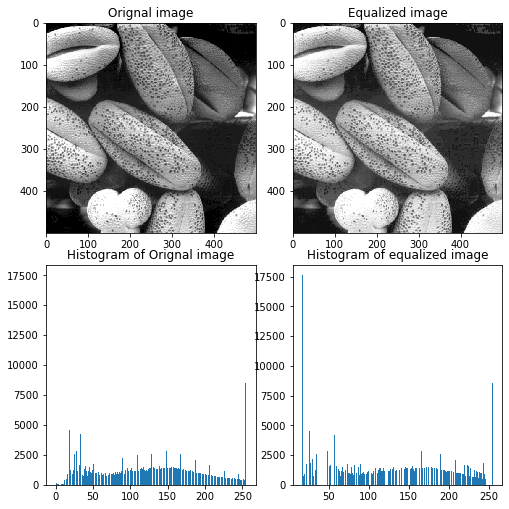

In [13]:
plt.figure(figsize=(7,7))
plt.subplot(2,2,1)
io.imshow(image)
plt.title('Orignal image')

plt.subplot(2,2,2)
io.imshow(image_eq)
plt.title('Equalized image')

plt.subplot(2,2,3)
plt.hist(image.flatten(),bins=256)  # flatten converts 2d to 1d array
plt.title('Histogram of Orignal image')

plt.subplot(2,2,4)
plt.hist(image_eq.flatten(),bins=256)
plt.title('Histogram of equalized image')

In [14]:
image.shape

(500, 500)

In [15]:
image.flatten().shape

(250000,)

Histogram equalisation is applied to the images of various contrast levels for dark images like pollen dark and pollen very dark 
histogram is concentrated in lower range of pixel intensities after applying histogram equalization, histogram is redistributed and contrast of the image
improves for very bright images, histogram is concentrated for higher range of intensity after applying equalisation, contrast of the image imporves
if orignal image is having good contrast levels and histogram equalisation is appied on it there is no substantial improvement in the contrast